# Módulo 26 - Álgebra Linear

## Tarefa

Luciana Gonzaga

---

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

#### *Calculando média e diferença:*

In [2]:
df['média'] = df.mean(axis=1)
df['diferença'] = df.p2-df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença
0,"7,0","7,9","7,5","1,0"
1,"2,9","5,1","4,0","2,2"
2,"2,3","1,0","1,6","-1,3"
3,"5,5","4,5","5,0","-1,0"
4,"7,2","8,9","8,1","1,7"
5,"4,2","3,4","3,8","-0,8"
6,"9,8","9,8","9,8","0,0"
7,"6,8","7,9","7,4","1,1"
8,"4,8","5,7","5,3","0,9"
9,"3,9","5,7","4,8","1,8"


In [9]:
def translin_v2(m, var1, var2):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1,1,1)

    xmin = -2
    xmax = df.p1.max()*1.1
    ymin = -2
    ymax = df.p2.max()*1.1

    ax.axis('equal')
    ax.set_aspect('equal', 'box')
    ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

    lista_xticks = list(range(int(xmin), int(xmax)+1))
    ticksx = ax.set_xticks(lista_xticks)
    labelsx = ax.set_xticklabels(lista_xticks, fontsize='large')

    lista_yticks = list(range(int(ymin), int(ymax)+1))
    ticksy = ax.set_yticks(lista_yticks)
    labelsy = ax.set_yticklabels(lista_yticks, fontsize='large')

    ax.axvline(0, linewidth=.5, linestyle='--')
    ax.axhline(0, linewidth=.5, linestyle='--')

    ax.arrow(0, 0, m[0,0], m[0,1]
             , head_width=0.25
             , head_length=0.1
             , fc='g', ec='g', 
             length_includes_head=True)

    ax.arrow(0, 0, m[1,0], m[1,1]
             , head_width=0.25
             , head_length=0.1
             , fc='r', ec='r', 
             length_includes_head=True)

    plt.scatter(x = df.p1, y=df.p2, label = 'originais')
    plt.scatter(x = df[var1], y=df[var2], label = 'transformados')

    ax.legend(loc='upper left')

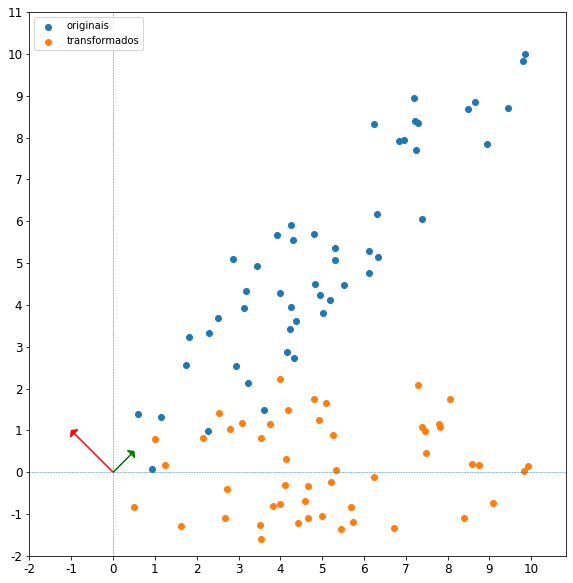

In [10]:
t = np.array([[ .5, .5],
              [ -1, 1]])
translin_v2(t, 'média', 'diferença')

#### *Correlação entre p1 e p2:*

In [7]:
df['p1'].corr(df['p2'])

0.8957365818728046

- Indica forte correlação positiva entre p1 e p2 (próxima de 1).

#### *Correlação entre média e diferença:*

In [8]:
df['média'].corr(df['diferença'])

0.13347385411788837

- Média e diferença possuem uma correlação muito fraca (próxima de 0).

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

In [11]:
df['soma'] = df.p2+df.p1
df.style.format(precision=1, decimal=',')

,p1,p2,média,diferença,soma
0,"7,0","7,9","7,5","1,0","14,9"
1,"2,9","5,1","4,0","2,2","8,0"
2,"2,3","1,0","1,6","-1,3","3,2"
3,"5,5","4,5","5,0","-1,0","10,0"
4,"7,2","8,9","8,1","1,7","16,1"
5,"4,2","3,4","3,8","-0,8","7,7"
6,"9,8","9,8","9,8","0,0","19,6"
7,"6,8","7,9","7,4","1,1","14,8"
8,"4,8","5,7","5,3","0,9","10,5"
9,"3,9","5,7","4,8","1,8","9,6"


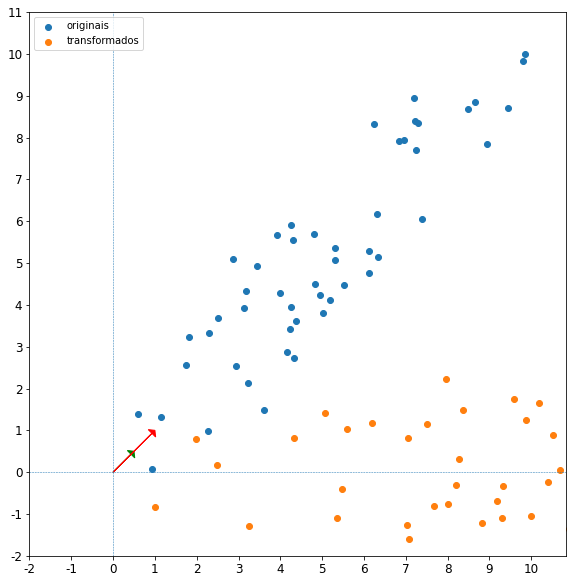

In [12]:
t = np.array([[ .5, .5],
              [ 1, 1]])
translin_v2(t, 'soma','diferença')

- Os dois vetores (de soma e diferença) possuem mesma direção e sentido fazendo com que os pontos transformados fiquem mais espaçados ao longo do eixo x, diferente da transformação anterior onde o vetor da média era perpendicular ao vetor da diferença fazendo com que os pontos trasnformados ficassem mais próximos da origem do gráfico (0,0).